In [6]:
import numpy as np
import pandas as pd


# this is not to show warnings

import warnings
warnings.filterwarnings('ignore')


# this it the most common viz library in python

import matplotlib.pyplot as plt

# this one is the above on steroids


import seaborn as sns


data = pd.read_csv(r'C:\\Users\User\Desktop\iRonhack\Classes at Iron\Week 13\Day 3\lab-feature-engineering\project files\learningset.txt')

In [7]:
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


Instructions
Complete the following steps on the categorical columns in the dataset:

Check for null values in all the columns

In [8]:
categorical_columns = data.select_dtypes(include=['object'])


print(categorical_columns.columns)

Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER',
       'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18',
       'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
       'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')


Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories
ZIP CODE - we are including state already

In [9]:
drop_list = []

drop_list.append('OSOURCE')
drop_list.append('ZIP CODE')

In [10]:
drop_list

['OSOURCE', 'ZIP CODE']

Identify columns that over 85% missing values


In [11]:
null_df = categorical_columns.isnull().sum() / len(categorical_columns)
threshold = 0.85
columns_above_threshold = null_df[null_df > threshold]
print(columns_above_threshold)

Series([], dtype: float64)


Remove those columns from the dataframe



There are no such columns...

Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

Note that there are a few null values in the column. We will first replace those null values using the code below:
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [12]:
print(categorical_columns['GENDER'].value_counts())


GENDER
F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: count, dtype: int64


In [13]:
print(categorical_columns['GENDER'].value_counts())
categorical_columns['GENDER'] = categorical_columns['GENDER'].fillna('F')

GENDER
F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: count, dtype: int64


In [14]:
categorical_columns['GENDER'] = categorical_columns['GENDER'].replace({'M': 'M', 'F': 'F'}).fillna('other')

In [15]:
print(categorical_columns['GENDER'].value_counts())

GENDER
F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: count, dtype: int64


Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

Check for null values in the numerical columns.

In [17]:
numerical_columns = data.select_dtypes(include=['number'])

print(numerical_columns.columns)


Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=407)


In [25]:
null_values_numerical = numerical_columns.isnull().sum()
print(null_values_numerical)

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64


In [24]:
specific_columns = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
missing_specific_columns = [col for col in specific_columns if col not in numerical_columns.columns]

print("Missing specific columns:", missing_specific_columns)

Missing specific columns: ['GEOCODE2']


In [ ]:
# 'GEOCODE2' is not numerical ?

In [27]:
missing_values_specific = numerical_columns[['WEALTH1', 'ADI', 'DMA', 'MSA']].isnull().sum()
percentage_missing_specific = (missing_values_specific / len(numerical_columns)) * 100

print(percentage_missing_specific)

WEALTH1    46.882992
ADI         0.138347
DMA         0.138347
MSA         0.138347
dtype: float64


Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [44]:
numerical_columns.dropna(subset=['WEALTH1', 'ADI', 'DMA', 'MSA'], inplace=True)

In [45]:
missing_values_specific = numerical_columns[['WEALTH1', 'ADI', 'DMA', 'MSA']].isnull().sum()
print(missing_values_specific)

WEALTH1    0
ADI        0
DMA        0
MSA        0
dtype: int64


In [46]:
unique_values_wealth1 = numerical_columns['WEALTH1'].unique()
unique_values_adi = numerical_columns['ADI'].unique()
unique_values_dma = numerical_columns['DMA'].unique()
unique_values_msa = numerical_columns['MSA'].unique()


print("Unique values in WEALTH1:", unique_values_wealth1)
print("Unique values in ADI:", unique_values_adi)
print("Unique values in DMA:", unique_values_dma)
print("Unique values in MSA:", unique_values_msa)

Unique values in WEALTH1: [9. 1. 4. 2. 6. 0. 5. 8. 3. 7.]
Unique values in ADI: [ 13. 281.  67. 127.  91. 251. 391. 269.  83. 107. 291.  57. 329.  55.
  73. 159. 201.  75. 203. 105. 111. 173. 351. 109. 197. 279. 645. 361.
 113. 131. 199. 187. 129. 441. 209. 235.  39. 335. 577. 439. 455. 383.
 249. 263.   0. 427. 185.  15. 245.  51. 175.  59. 119. 233. 273. 325.
 371. 377.  89. 181. 342. 421. 219.  65. 283. 339. 417. 299. 271.  87.
 451. 315. 157.  71. 363. 367. 275. 403.  77. 448. 217. 221. 165. 393.
 207. 277. 319. 353. 247. 241. 307.  69. 323. 213. 381. 179. 389. 331.
 337. 457. 301. 359.  17.  53. 321. 327. 257. 413. 469. 303. 205. 412.
  63. 405. 373. 133. 211. 229. 243. 227.  61. 425. 253. 313. 423. 433.
  85. 215.  93. 115. 409. 445. 459. 177. 415. 449. 379. 237. 355. 255.
 437. 419.  19. 195. 467. 305. 435. 621. 295. 473.  11. 429. 183.  21.
 231. 462.   9. 431. 151. 317. 471. 117. 613. 465. 627. 293. 625. 121.
 375. 385. 591.  33. 603.  25.   3. 443.  29. 297. 123. 265. 135.  9

In [ ]:
Use appropriate EDA technique where ever necessary.

Text(0.5, 1.0, 'Distribution of WEALTH1')

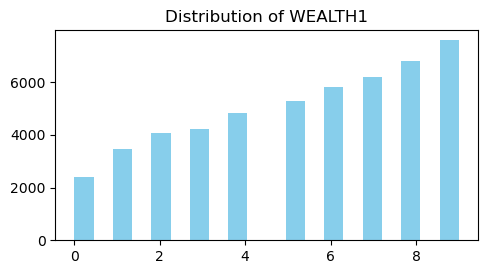

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(numerical_columns['WEALTH1'].dropna(), bins=20, color='skyblue')
plt.title('Distribution of WEALTH1')

Text(0.5, 1.0, 'Distribution of ADI')

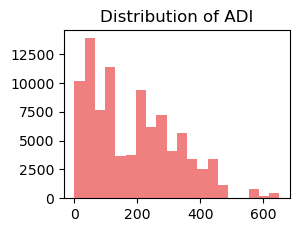

In [34]:
plt.subplot(2, 2, 2)
plt.hist(numerical_columns['ADI'].dropna(), bins=20, color='lightcoral')
plt.title('Distribution of ADI')